Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advance Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
**Name** | De los Reyes, Jann Moises Nyll B.
**Section** | CPE31S3
**Date Performed**: | January 27, 2024
**Date Submitted**: | February 02, 2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 1.1 : Neural Networks

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [2]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

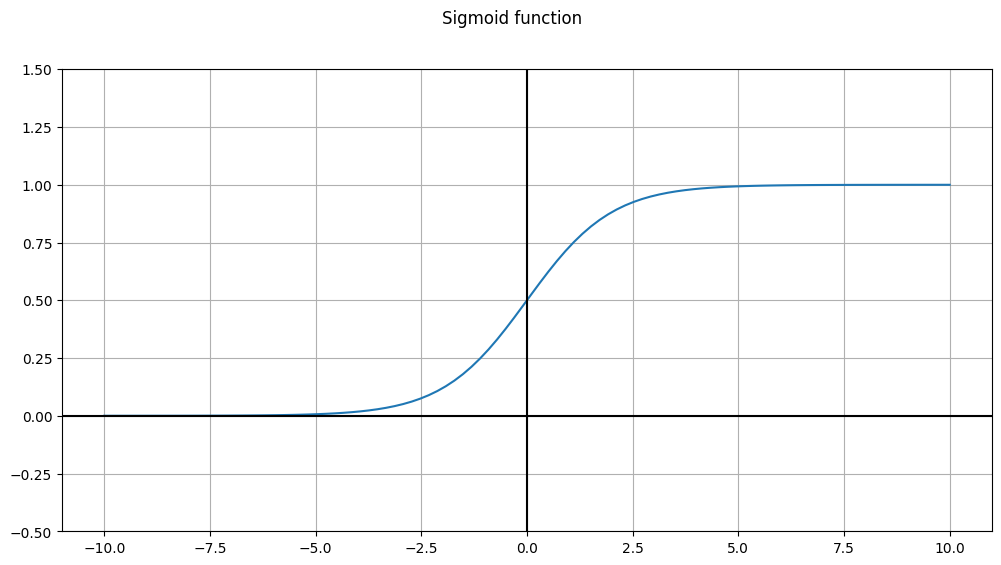

In [3]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [4]:
# Create step, relU, tanh, linear,softmax and leaky relU activation function
def step(x):
    return np.heaviside(x, 0)

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def linear(x):
    return x

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def leaky_relu(x):
    return np.maximum(0.01 * x, x)

Plot the activation function

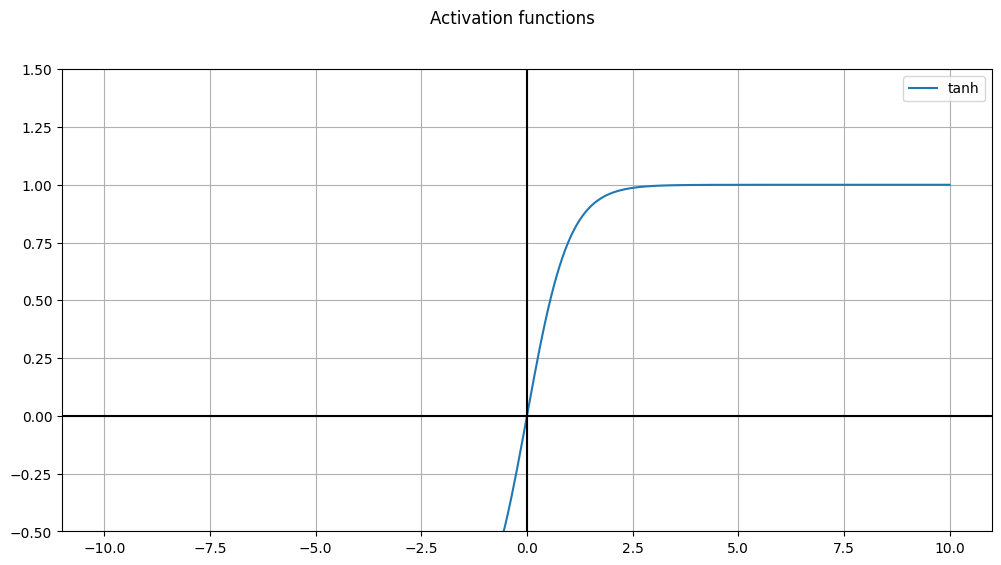

In [5]:
#make a function using subplot
def plot_activation_functions():
    vals = np.linspace(-10, 10, num=300, dtype=np.float32)
    fig = plt.figure(figsize=(12,6))
    fig.suptitle('Activation functions')
    #plt.plot(vals, sigmoid(vals), label='sigmoid')
    #plt.plot(vals, step(vals), label='step')
    #plt.plot(vals, relu(vals), label='relu')
    plt.plot(vals, tanh(vals), label='tanh')
    #plt.plot(vals, linear(vals), label='linear')
    #plt.plot(vals, softmax(vals), label='softmax')
    #plt.plot(vals, leaky_relu(vals), label='leaky relu')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.yticks()
    plt.ylim([-0.5, 1.5])
    plt.legend();

plot_activation_functions()

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [6]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [7]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [8]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 10
w2 =10
b = -10
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [9]:
# Nand gate
w1 = -10
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


In [10]:
# Nor gate
w1 = -10
w2 = -10
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [11]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [12]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [13]:
#Get the product of array x_in and W_1 (z2)
#Apply sigmoid function to z2 that results to a2
#Get the product of a2 and z2 (z3)
#Apply sigmoid function to z3 that results to a3
#Get the product of a3 and z3 that results to z4
z2 = np.dot(x_in,W_1)
a2 = sigmoid(z2)
z3 = np.dot(a2,z2)
a3 = sigmoid(z3)
z4 = np.dot(a3,z3)

In [14]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [15]:
#type your code here
y_out = soft_max_vec(z4)
print(y_out)

1.0


In [16]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [17]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [18]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [19]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-20-59ab5a319968>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-20-59ab5a319968>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


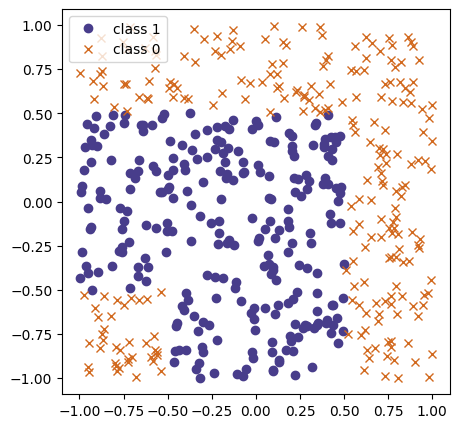

In [20]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [21]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

I: 0, loss: 0.8122363937709952, accuracy: 0.482
I: 200, loss: 0.5634650857030522, accuracy: 0.738
I: 400, loss: 0.5363488517004438, accuracy: 0.742
I: 600, loss: 0.5074051495950338, accuracy: 0.764
I: 800, loss: 0.46604207904254563, accuracy: 0.788
I: 1000, loss: 0.4173046928518629, accuracy: 0.812
I: 1200, loss: 0.378121481235635, accuracy: 0.844
I: 1400, loss: 0.3490700186711091, accuracy: 0.872
I: 1600, loss: 0.3199610444072492, accuracy: 0.88
I: 1800, loss: 0.2703948456082066, accuracy: 0.922
I: 2000, loss: 0.22055670165205868, accuracy: 0.932
I: 2200, loss: 0.18869545095546425, accuracy: 0.956
I: 2400, loss: 0.16596180638655095, accuracy: 0.962
I: 2600, loss: 0.1488502638498622, accuracy: 0.972
I: 2800, loss: 0.13576181583994404, accuracy: 0.978
I: 3000, loss: 0.12548707446703458, accuracy: 0.98
I: 3200, loss: 0.11719368831763183, accuracy: 0.982
I: 3400, loss: 0.11033895506737358, accuracy: 0.984
I: 3600, loss: 0.10456317115542277, accuracy: 0.984
I: 3800, loss: 0.099618577169058

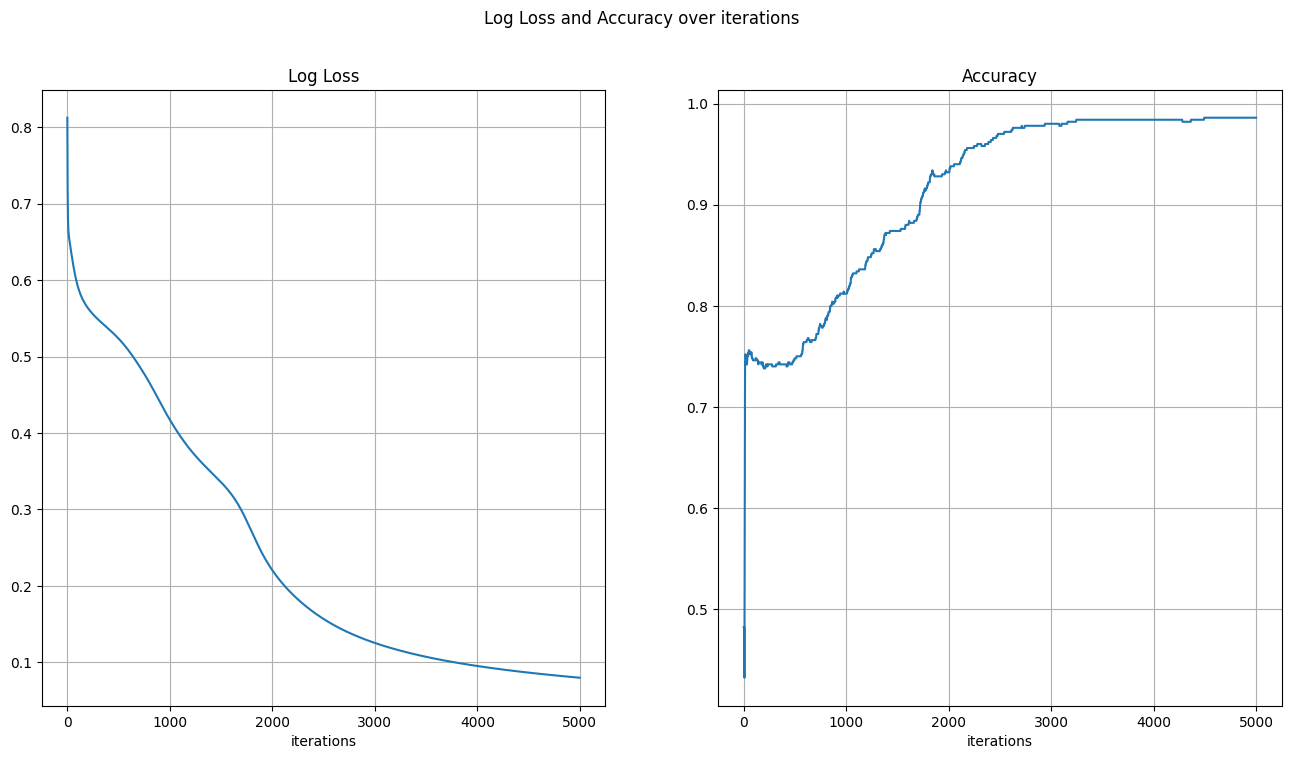

In [22]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size = (3, 4))
W_2 = np.random.uniform(-1,1,size = (4))
num_iter = 5000
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (grad_1, grad_2) = forward_pass(W_1, W_2)

    ## Update the weight matrices
    W_1 = W_1 - learning_rate*grad_1
    W_2 = W_2 - learning_rate*grad_2

    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    accuracy = np.sum((y_pred >= 0.5) == y) / num_obs
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i % 200) == 0:
      print('I: {}, loss: {}, accuracy: {}'.format(i, loss, accuracy))


plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow

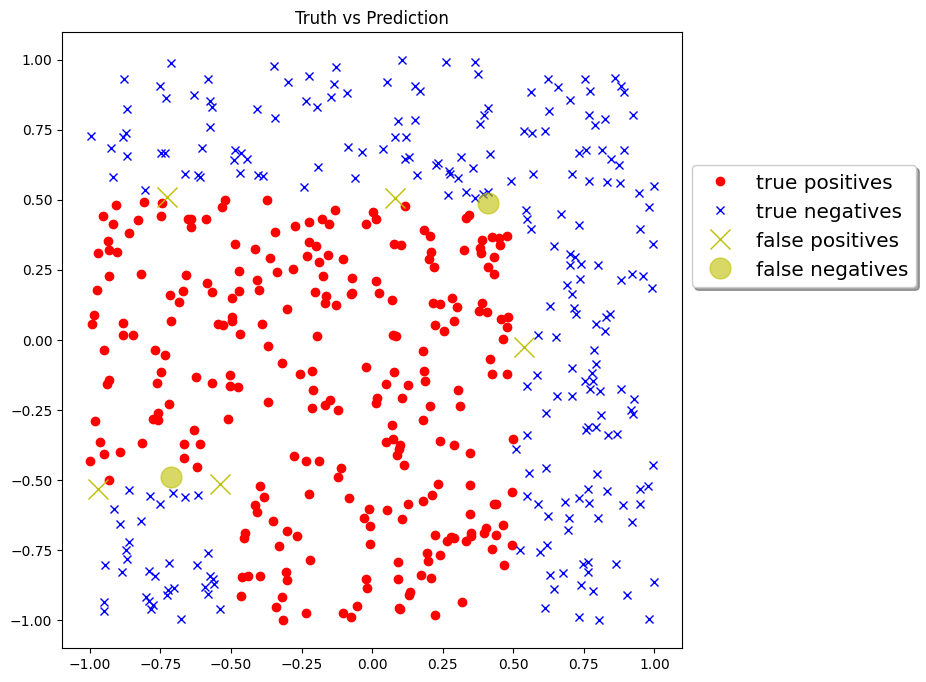

In [23]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

## Observation to the exercise
- Which patterns was the neural network able to learn quickly and which took longer?

<font color = green> As I test different pattern, I observed that  it's speed depends on the complexity of the pattern. Pattern like circle  are easier for our model to learn  because a hyperlane in higher dimension can seperate class. Geometric shape such as diamond, certered square have clear boundaries that can be learn by our model to moderate amount of training. Meanwhile complex shapes or patttern like  the thick and thin  righ angle pattern particularly talke longer to learn due to the presence of class 0 data point within the class 1 region. This could potentially difficult to our network to classify.
- What learning rates and numbers of iterations worked well?

<font color = green> Learning rate of 0.001 work well in the exercise. Learning rate is the tuning parameter of the optimization algorithm to determine step size in each iteration while going to minimum the loss function. For the number of iteration  required in each pattern depends on the complexity of the pattern and the learning rate. As we train our network models, we want to  stabilize the accuracy reaches a satisfactory level. In the exercise we got 5000 iteration for achieving  a good accuracy  for simpler pattern.

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


<font color = orange> In this activity we will use the circle pattern with 3 different weight, input and hyperbolic tangent as our activation function. We will also apply feed forward and back propagation  and plot the loss and accuracy for every 300th iteration

shape of x_mat_full is (1000, 3)
shape of y is (1000,)


<ipython-input-47-8436e7a4acec>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-47-8436e7a4acec>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


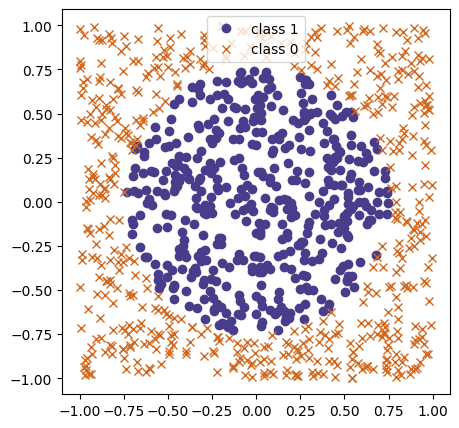

In [47]:
num_obs = 1000
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [50]:
def tanh(x):
  """
  Hyperbolic Tangent Function
  """
  return np.tanh(x)

def loss_fn(y_true, y_pred, eps=1e-16):
  y_pred = np.maximum(y_pred,eps)
  y_pred = np.minimum(y_pred,(1-eps))
  return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(W1, W2, W3):
    """
    Does a forward computation of the neural network with an additional hidden layer.
    Takes the input `x_mat` (global variable) and produces the output `y_pred`.
    Also produces the gradient of the log loss function.
    """
    global x_mat
    global y
    global num_

    # First hidden layer
    z_2 = np.dot(x_mat, W1)
    a_2 = tanh(z_2)

    # Second hidden layer
    z_3 = np.dot(a_2, W2)
    a_3 = tanh(z_3)

    # Output layer
    z_4 = np.dot(a_3, W3)
    y_pred = tanh(z_4[:, 0]).reshape((len(x_mat),))

    # Compute gradients
    J_z_4_grad = -y + y_pred  # Error at output layer

    # Gradient for W3 (output layer weights)
    J_W3_grad = np.dot(a_3.T, J_z_4_grad.reshape(-1, 1)) # Corrected gradient calculation

    # Gradient for W2 (second hidden layer weights)
    # Derivative of tanh is 1 - tanh^2
    a_3_z_3_grad = 1 - np.tanh(z_3)**2
    J_z_3_grad = J_z_4_grad.reshape(-1, 1) * W3[:,0].reshape(1, -1) * a_3_z_3_grad #Error at hidden layer 3

    J_W2_grad = np.dot(a_2.T, J_z_3_grad) #Corrected gradient calculation

    #Gradient for W1 (first hidden layer weights)
    a_2_z_2_grad = 1 - np.tanh(z_2)**2
    J_z_2_grad = np.dot(J_z_3_grad, W2.T) * a_2_z_2_grad

    J_W1_grad = np.dot(x_mat.T, J_z_2_grad) #Corrected gradient calculation

    gradient = (J_W1_grad, J_W2_grad, J_W3_grad)

    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

I: 0, loss: 8.396285440562302, accuracy: 0.542
I: 300, loss: 0.5260654785304208, accuracy: 0.752
I: 600, loss: 0.3471160415364216, accuracy: 0.918
I: 900, loss: 0.24770555398746918, accuracy: 0.95
I: 1200, loss: 0.21377054130401354, accuracy: 0.952
I: 1500, loss: 0.19412344426688924, accuracy: 0.953
I: 1800, loss: 0.1798394516350968, accuracy: 0.954
I: 2100, loss: 0.1688962259188468, accuracy: 0.954
I: 2400, loss: 0.1602501890353696, accuracy: 0.952
I: 2700, loss: 0.1533426042149077, accuracy: 0.954
I: 3000, loss: 0.1476455868240016, accuracy: 0.954
I: 3300, loss: 0.1426512332271484, accuracy: 0.961
I: 3600, loss: 0.13809684258987745, accuracy: 0.961
I: 3900, loss: 0.13386628584583166, accuracy: 0.959
I: 4200, loss: 0.12996177602515951, accuracy: 0.96
I: 4500, loss: 0.12633842682419447, accuracy: 0.961
I: 4800, loss: 0.1229719130512163, accuracy: 0.963
I: 5100, loss: 0.11985377746824631, accuracy: 0.968
I: 5400, loss: 0.11697678464081394, accuracy: 0.969
I: 5700, loss: 0.11431922077632

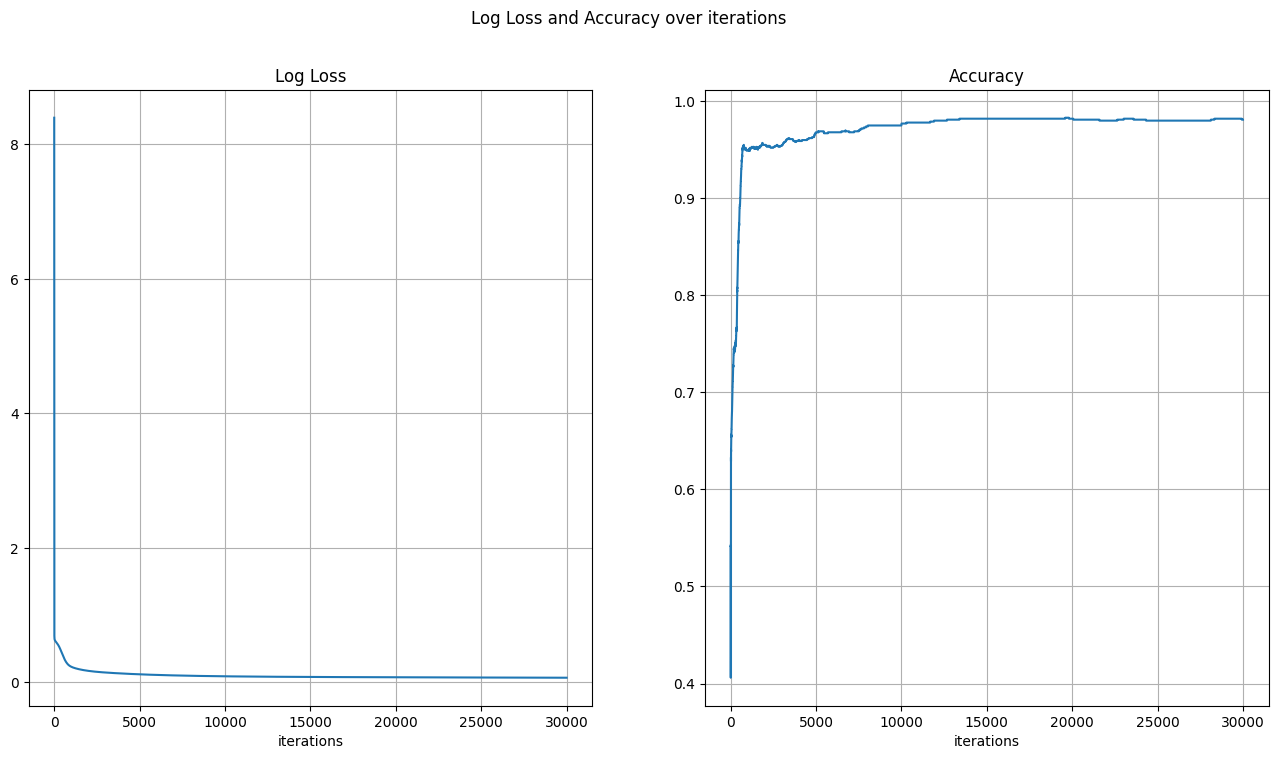

In [56]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size = (3,5))
W_2 = np.random.uniform(-1,1,size = (5,3))
W_3 = np.random.uniform(-1,1,size = (3,2))
num_iter = 30000
learning_rate = 0.0001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (grad_1, grad_2,grad_3) = forward_pass(W_1, W_2,W_3)

    ## Update the weight matrices
    W_1 = W_1 - learning_rate*grad_1
    W_2 = W_2 - learning_rate*grad_2
    W_3 = W_3 - learning_rate*grad_3

    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    accuracy = np.sum((y_pred >= 0.5) == y) / num_obs
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i % 300) == 0:
      print('I: {}, loss: {}, accuracy: {}'.format(i, loss, accuracy))


plot_loss_accuracy(loss_vals, accuracies)

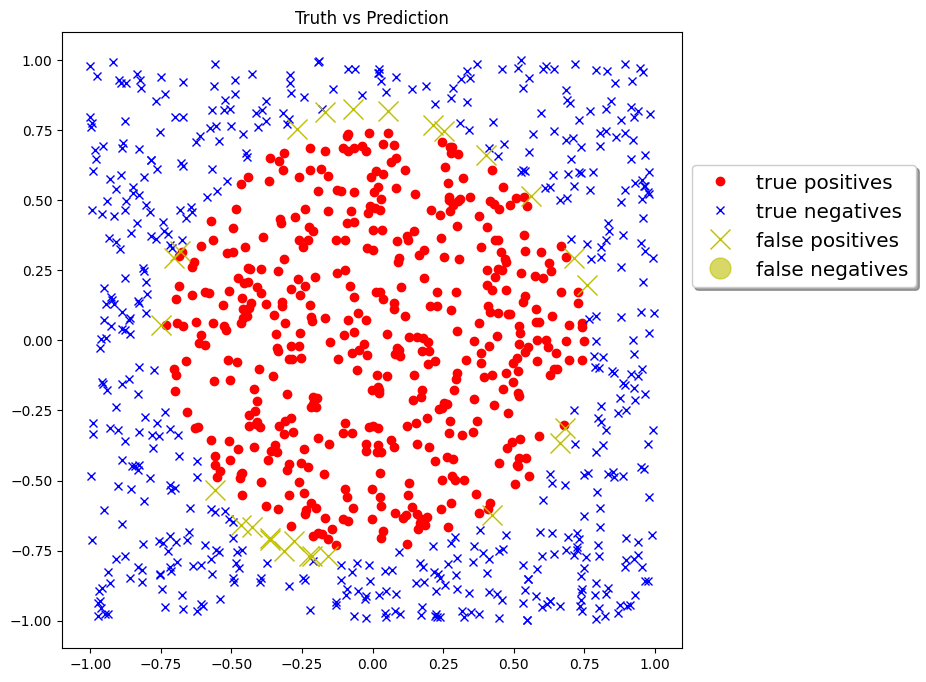

In [54]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

<font color = orange> Using  a hyperbolic tangent as our activation function and circle pattern for our classification shaped we found that  initially we have  a higher inital loss  and low accuracy as the network random initialization and also it hasn't yet learn to different between two classes. The Loss reduce as the training progress which demonstrate the effectiveness of backpropagation in optimizing the networks weight. The accuracy also improve which indicate  the effective learning of the machine to undestand relationship between  the features and target variable. The loss gradually converge toward lower value  however it not reach an absolute zero  due to the inherent complexity of the problem and model's capacity. Lastly, the final accuracy  achieved in the activity successfully capture the characteristic of the circle pattern this is demonstrated by our  model's predictive performance.

<font color = orange> Overall, the number of learning rate and iteration  really affect the performance of the model. In this activity a learning rate of 0.0001 and 30,000 iteration were utilized  which enabled the network to converge to a low loss and achieve  high accuracy.

#### Conclusion

<font color = blue> In this notebook, we learn the fundamentals of neural network by exploring the basics and the mathematics behind the activation function which we will use to perform FeedForward and  Back Propagation algorithms.

<font color = blue>In the exercises given we implemented  multi-layer perceptron with single hidden layer and trained using backpropagation. I also try different patterns and observed how the networks learn them based on the accuracy and loss over iteration.

<font color = blue> I also expanded my knowledge by applying what I learn from the activity. By modifying with different weights, input and hyperbolic tangent as activation function. The experiment  provided us an insigt  to the effect of different network parameter on learning complex patterns. I also plotted the loss and accuracy for every 300th iteration.

<font color = blue> I find that simple patterns like circle and diamon are easier for the network to learn, complex pattern such as thick and thin right angle require more training. I also notice that the learning rate and number of iteration play a crucial role in optiming the network performance.